<a href="https://colab.research.google.com/github/Shalimaaji/GuviProject/blob/main/Customer_Conversion_Prediction_GuviProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
You are working for a new-age insurance company and employ
multiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective ways to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 

from sklearn import metrics 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")

# **Import the Data set**

In [2]:
data=pd.read_csv('/content/Customer Conversion Prediction - Customer Conversion Prediction.csv')

In [3]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


# **Checking Balanced or Not**

In [4]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [5]:
((39922)/(39922+5289))*100

88.30151954170445

In [6]:
((5289)/(39922+5289))*100

11.698480458295547

The target column is imbalanced here
1. Majority class is from no (88.3%)
2. Minority class is from yes (11.6%)

In [7]:
data['y']=data['y'].map({'yes':1,'no':0})

# **Data_Processing**

In [8]:
data.shape

(45211, 11)

# **1. Clean_The_Data**

To clean the data, 4 steps:

1. Missing values(data) and checking duplicate data
2. Spelling correction
3. Data format check (datatype)
4. Outlier check

In [9]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


**First step is to check if there is any missing value (data) and Duplicates data**

In [10]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There are no null values in any columns

In [11]:
data.duplicated().sum()

6

We got 6 duplicates in the data. We can drop the duplicates

In [12]:
data=data.drop_duplicates()
data.duplicated().sum()

0

First Part is done.

# **2. To Check is the data is in right format**

In [13]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

Every datatypes are set well, no need to change.

# **3. To check is there any spelling mistakes in object datas**

In [14]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [15]:
print(data['job'].unique())
print(data['marital'].unique())
print(data['education_qual'].unique())
print(data['call_type'].unique())
print(data['mon'].unique())
print(data['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[0 1]


There is no spelling mistakes

# **4. Is there any outliers in the given data**

In [16]:
data.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


AGE AND DAY

In [17]:
outlier=[]
mean,std=40.937087,10.619130
for i in data['age']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

outlier1=[]
mean1,std1=15.80688,8.32234	
for i in data['day']:
    x = (i-mean1)/std1
    if x > 3 or x <-3:
        outlier1.append(i)
print(len(outlier1))

381
0


AGE: Having a valid outlier...min age-18,max age-95.

DAY: There is no outliers...min -1, max -31

DUR & NUM_CALLS

In [18]:
outlier=[]
mean,std=258.183055,257.538504
for i in data['dur']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

outlier1=[]
mean1,std1=2.763898,3.098189	
for i in data['num_calls']:
    x = (i-mean1)/std1
    if x > 3 or x <-3:
        outlier1.append(i)
print(len(outlier1))    

963
840


DURATION: Having a valid outliers...min-0,max-4918(nearly 1hr 20 minutes).

NUM_CALLS: Having a valid outliers...min-1,max-63

# **EDA**

From EDA we can decide the encode type and feature relationships and importance.

# *Distribution of Features*

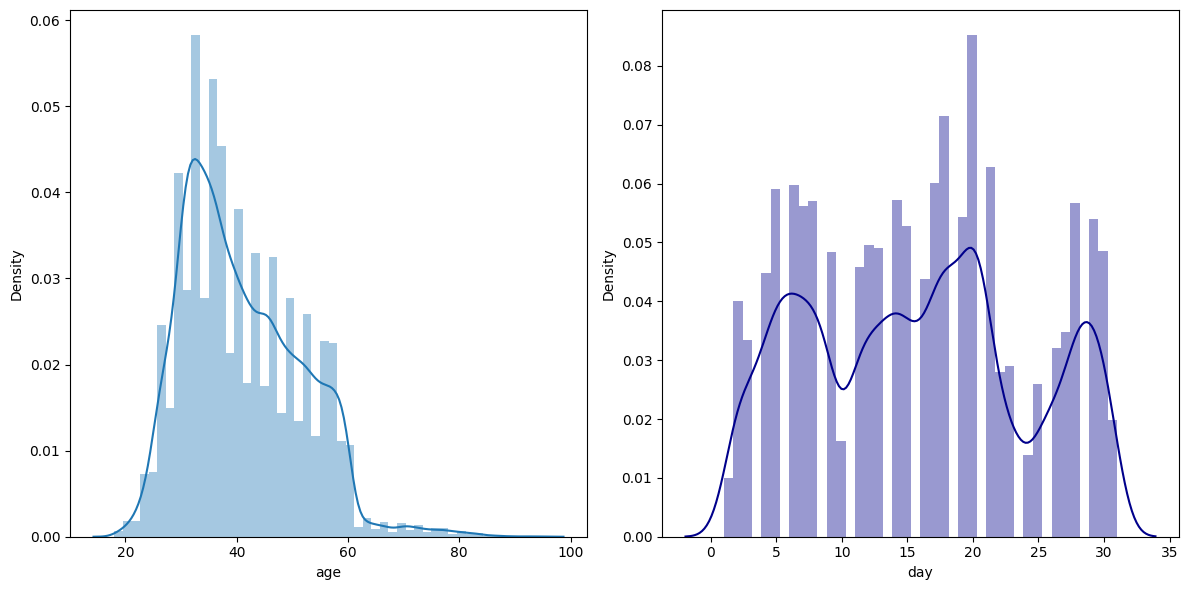

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(data.age)
plt.subplot(1,2,2)
sns.distplot(data.day,color = 'darkblue')
plt.tight_layout()

The AGE distributed between 18 to 95, the middle age people from 30 to 50 active in insurance processes.

The DAY distributed between 1 to 31

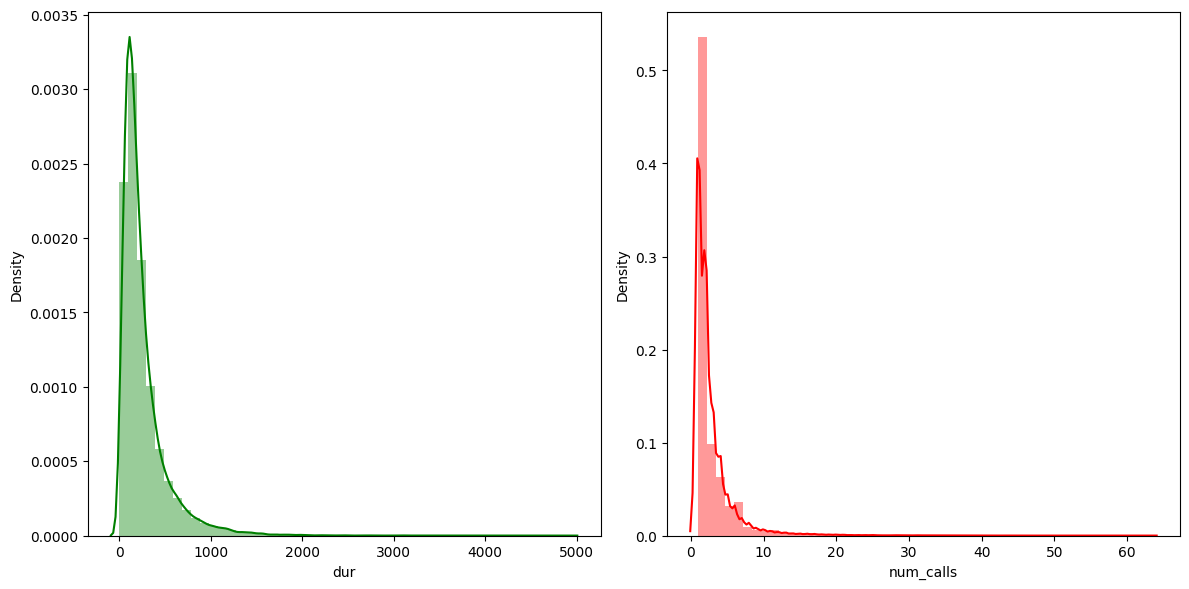

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(data.dur,color = 'green')
plt.subplot(1,2,2)
sns.distplot(data.num_calls,color = 'red')
plt.tight_layout()

The DUR distributed between 0 to 1500. The NUM_CALLS distributed between 1 to 31.

# ***Percentage distribution***


# **JOB**

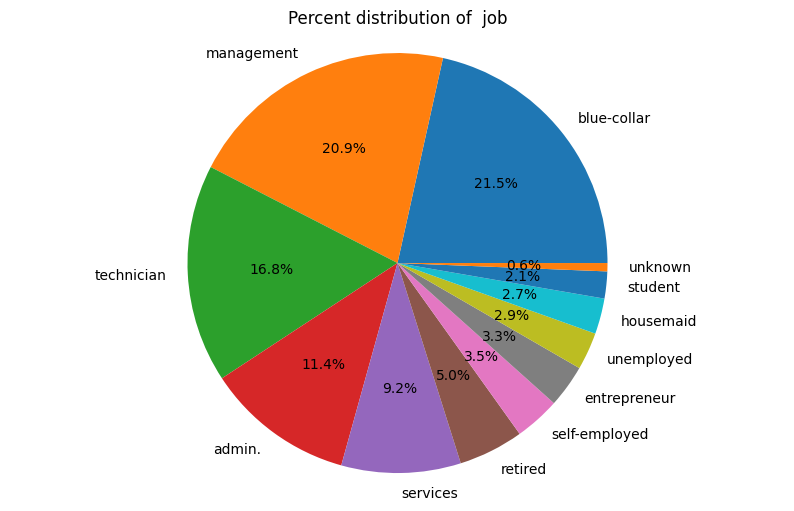

In [21]:
plt.figure(figsize=(10,6))
df_source = data.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  job')
plt.axis('equal')
plt.show()

In percentage distribution of job, we got MANAGEMENT in high range and UNKNOWN in low range.

# **MARITAL**

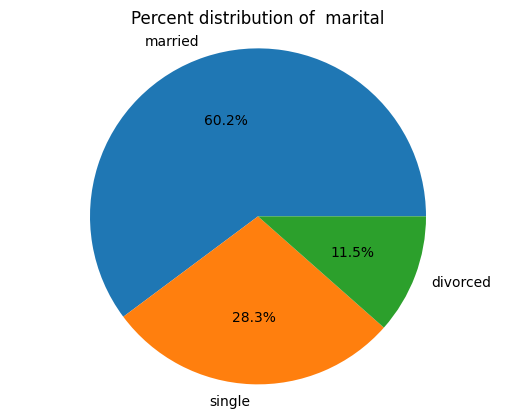

In [22]:
df_source = data.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  marital')
plt.axis('equal')
plt.show()

In percentage distribution of marital status, we got MARRIED distributed more than others. MARRIED peoples have more commitment other than all over here.

# **EDUCATION_QUAL**

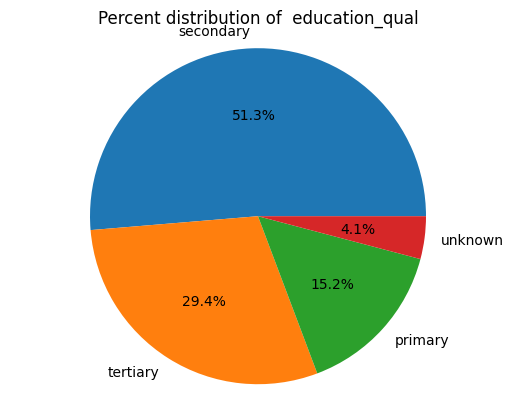

In [23]:
df_source = data.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  education_qual')
plt.axis('equal')
plt.show()

In percentage distribution of education qualification, we got SECONDARY distributed more than others. Here, SECONDARY qualified may aware of the insurance benefits other than people over mentioned here.

# **CALL_TYPE**

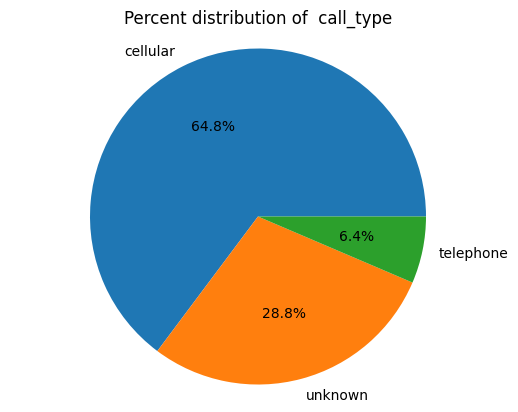

In [24]:
df_source = data.call_type	.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  call_type')
plt.axis('equal')
plt.show()

In percentage distribution of call type,we got cellular distributed more than others.

# **MON**

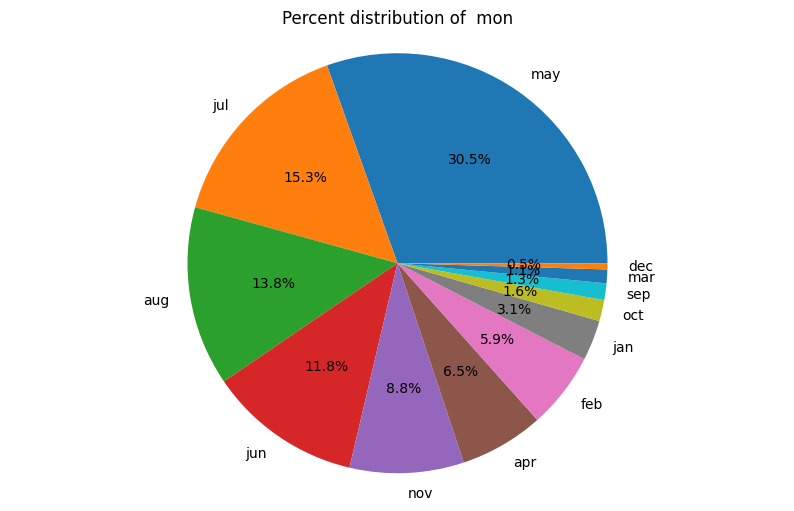

In [25]:
plt.figure(figsize=(10,6))
df_source = data.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  mon')
plt.axis('equal')
plt.show()

In percentage distribution of call type,we got SECONDARY distributed as more than others.

# **PREV_OUTCOME**

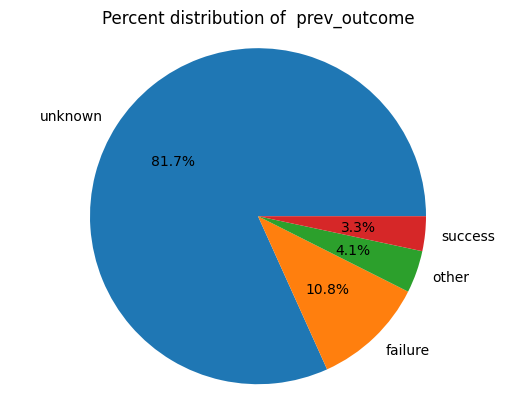

In [26]:
df_source = data.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  prev_outcome')
plt.axis('equal')
plt.show()

In percentage distribution of previous outcome ,we got unknown distributed more than others.

# ***BAR PLOT PERSPECTIVE FOR Call_type,mon,prev_outcome,prev_outcome***

In [27]:
A=data['call_type'].groupby(data['call_type']).count()
B=data['mon'].groupby(data['mon']).count()
C=data['prev_outcome'].groupby(data['prev_outcome']).count()
D=data['day'].groupby(data['day']).count()

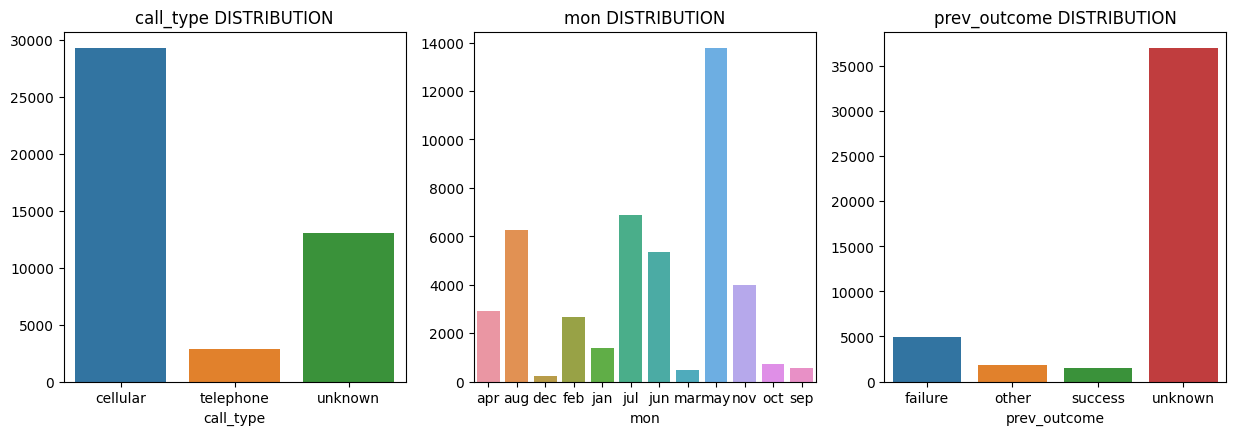

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.barplot(x=A.index,y=A.values,data=data)
plt.title('call_type DISTRIBUTION')

plt.subplot(2,3,2)
sns.barplot(x=B.index,y=B.values,data=data)
plt.title('mon DISTRIBUTION')

plt.subplot(2,3,3)
sns.barplot(x=C.index,y=C.values,data=data)
plt.title('prev_outcome DISTRIBUTION')

plt.show()
plt.tight_layout()

CELLUAR: Cellular distibuted more than others. It may be one of the reason now a days cellular is used more than others.

MON: May distributed more than others. It may be vacation time for the people.

PREV_OUTCOME: Unknown distributed more than others. It may be the people may not used to share the information.

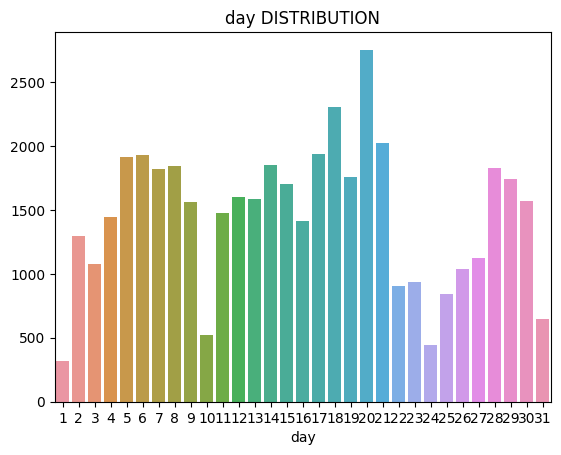

In [29]:
sns.barplot(x=D.index,y=D.values,data=data)
plt.title('day DISTRIBUTION')
plt.show()

DAY: It may doesn't make any impact to the prediction we can keep it or drop the day column.

# **Percentage of features in together**

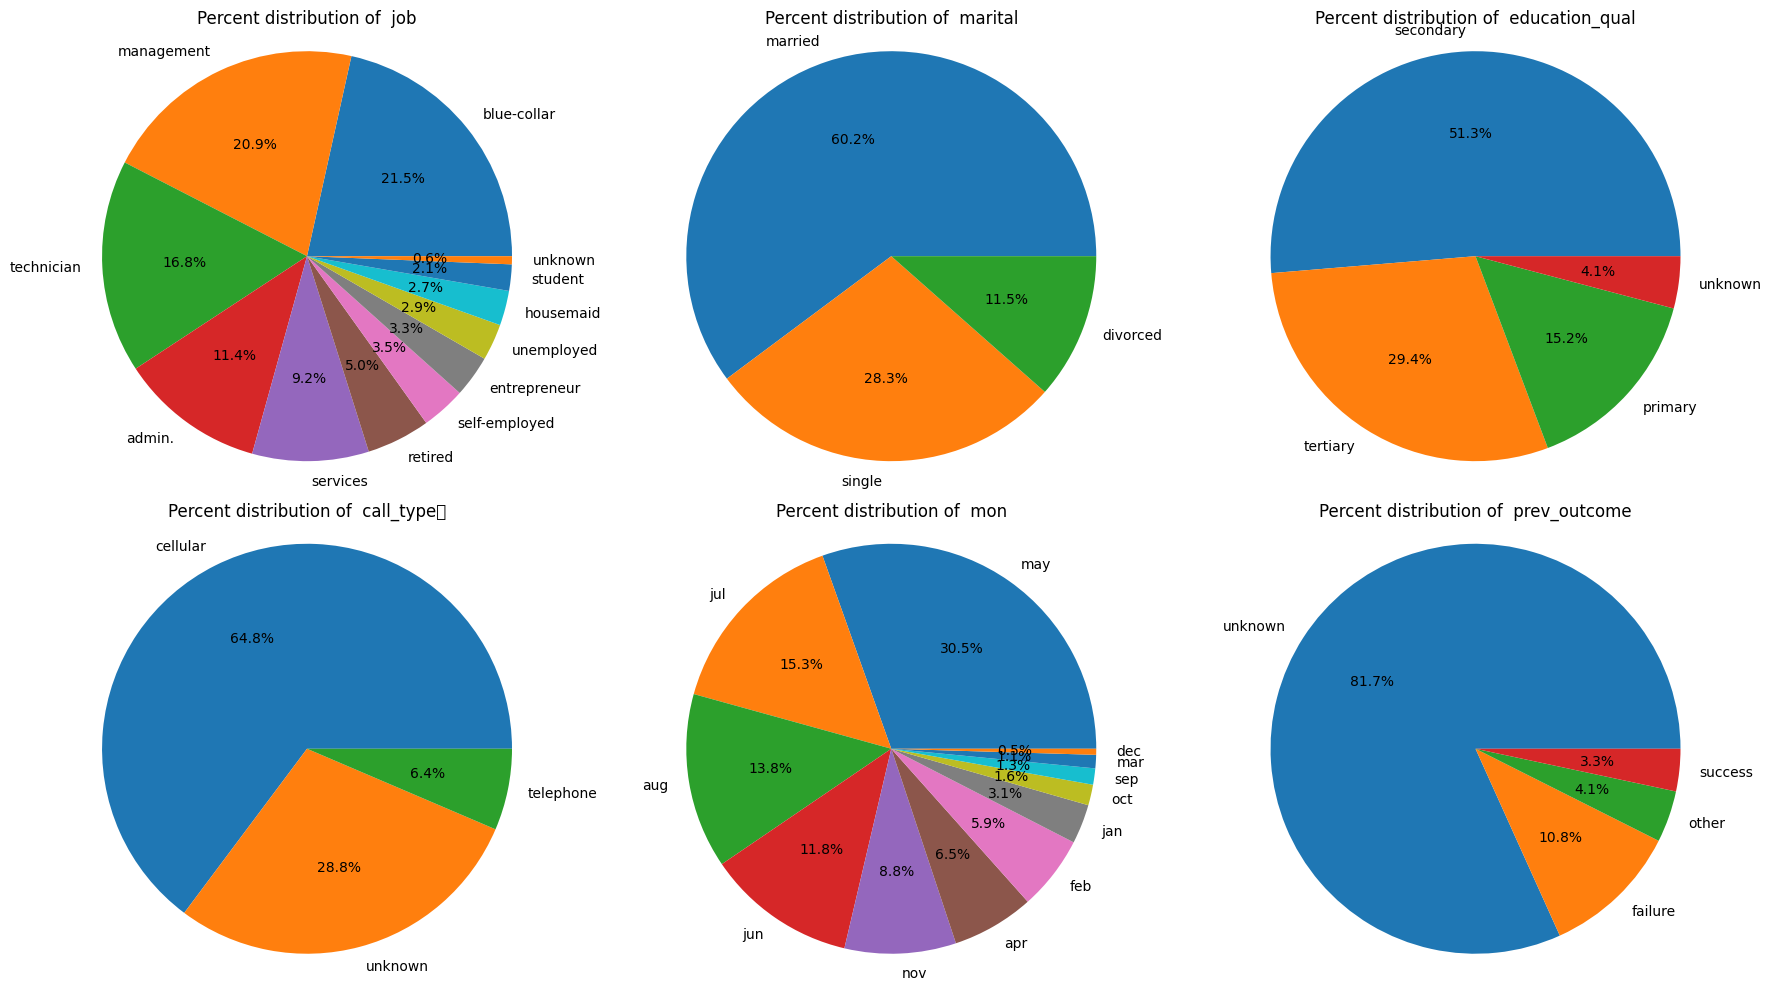

In [30]:
plt.figure(figsize=(18,10))

plt.subplot(231)
df_source = data.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  job')
plt.axis('equal')

plt.subplot(232)
df_source = data.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  marital')
plt.axis('equal')

plt.subplot(233)
df_source = data.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  education_qual')
plt.axis('equal')

plt.subplot(234)
df_source = data.call_type	.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  call_type	')
plt.axis('equal')

plt.subplot(235)
df_source = data.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  mon')
plt.axis('equal')

plt.subplot(236)
df_source = data.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  prev_outcome')
plt.axis('equal')

plt.tight_layout()
plt.show()

# ***For Conitnuous Columns***

# **AGE**

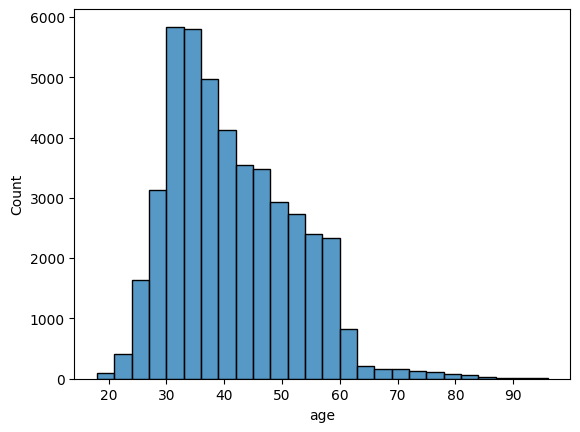

In [31]:
sns.histplot(data=data, x="age", binwidth=3)
plt.show()

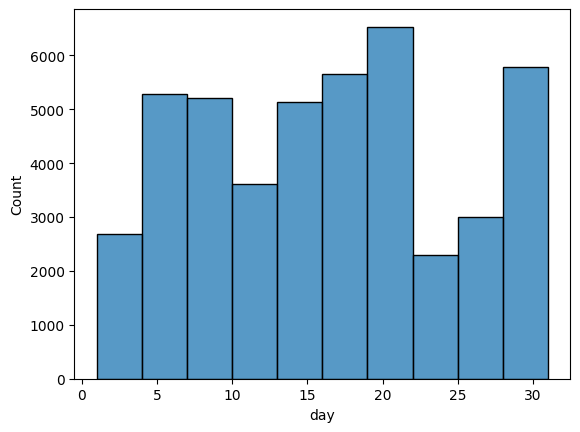

In [37]:
sns.histplot(data=data, x="day", binwidth=3)
plt.show()

DAY : The middle of the day recieve more than other.

# **DUR**

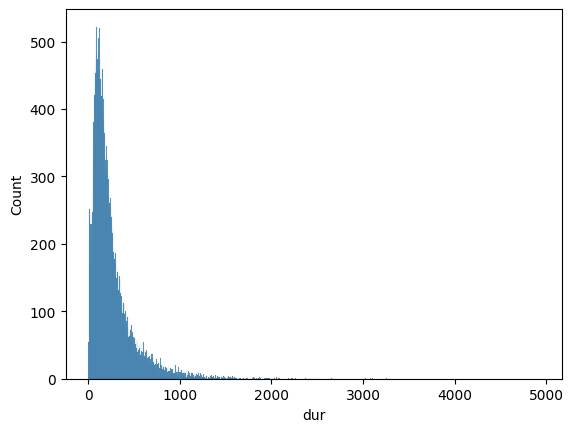

In [38]:
sns.histplot(data=data, x="dur", binwidth=3)
plt.show()

DUR: Call duration impact the model to subcribe the insurance.

# **NUM_CALLS**

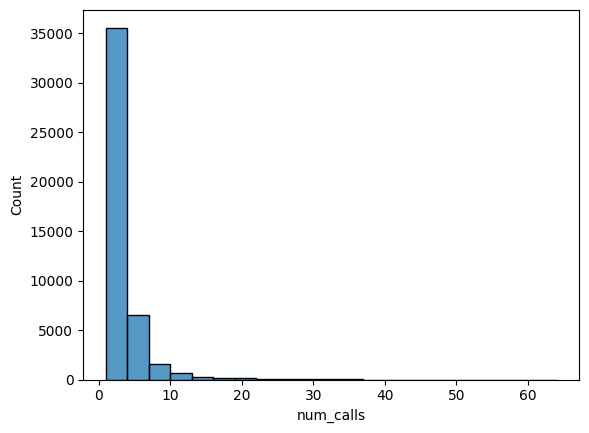

In [39]:
sns.histplot(data=data, x="num_calls", binwidth=3)
plt.show()

NUM_CALLS: num_calls also one of the reason to sbscribe the insurance.


# ***ALL CONTINUOUS FEATURES PLOTS TOGETHER HERE FOR OUR OVERVIEW***

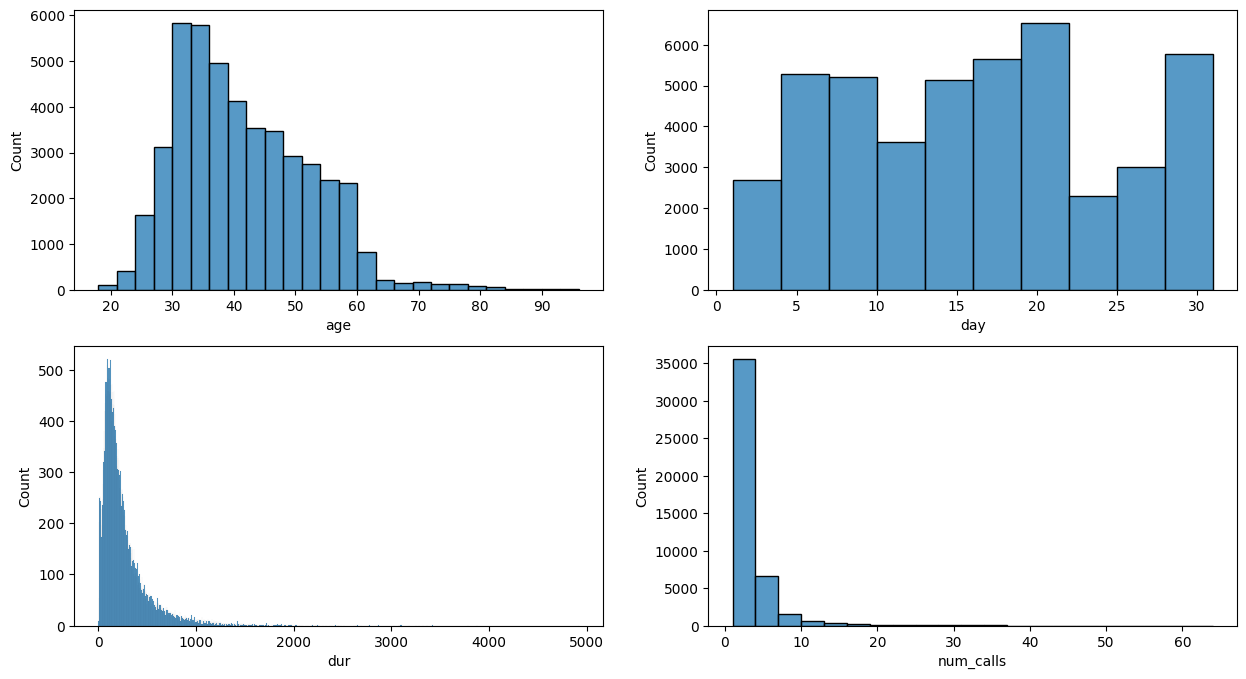

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.histplot(data=data, x="age", binwidth=3)

plt.subplot(222)
sns.histplot(data=data, x="day", binwidth=3)

plt.subplot(223)
sns.histplot(data=data, x="dur", binwidth=3)

plt.subplot(224)
sns.histplot(data=data, x="num_calls", binwidth=3)

plt.show()
plt.tight_layout()

# ***FEATURES VS TARGET***

# **JOB**

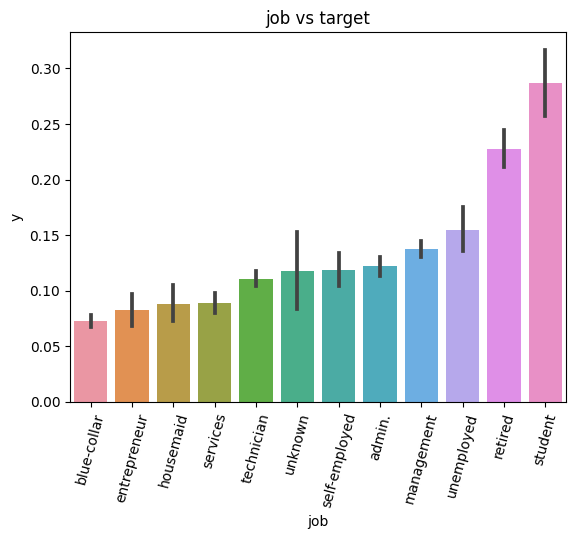

In [41]:
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=75)
plt.title('job vs target')
plt.show()     

FROM JOB VS TARGET , We got that student are targeted to subcribe the insurance more than others and then, the RETIRED people are targeted more. We can use one-hot encoding for job because of there is no linear increase in job column. But it may leads to us to handel more number of columns.SO, here we avoid one-hot and go with label.

{'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5','self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11}

# **MARITAL**

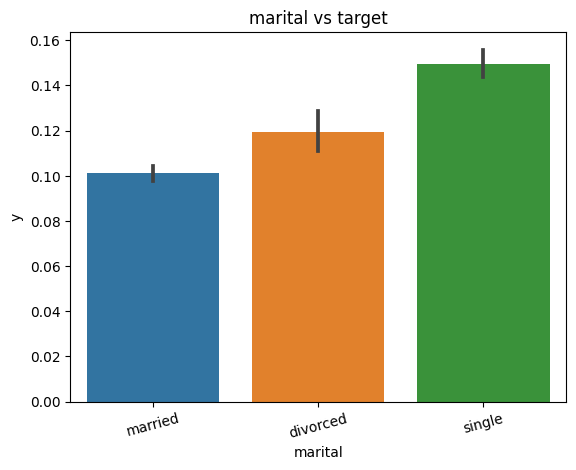

<Figure size 640x480 with 0 Axes>

In [42]:
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')
plt.show()
plt.tight_layout()

FROM MARITIAL VS TARGET , We got SINGLE people targeted more to subscribe the insurance more than others.

We can use one-hot encoding for marital because, there is no linear increase in marital column.

# **EDUCATION_QUAL**

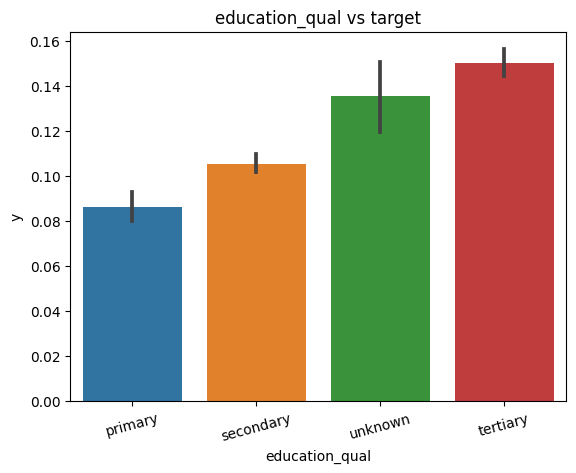

<Figure size 640x480 with 0 Axes>

In [43]:
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')
plt.show()
plt.tight_layout()

FROM EQUCATION QUALIFICATION VS TARGET , We got TERTIARY people interested more to subscribe the insurance more than others.

Education qualification gives as a linear increase, so we will go with lable encoding.

{'primary':0,'secondary':1,'unknown':2,'tertiary':3}

# **CALL_TYPE**

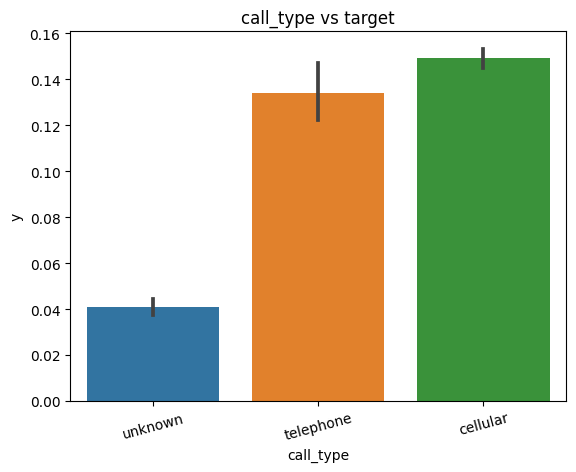

<Figure size 640x480 with 0 Axes>

In [44]:
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')
plt.show()
plt.tight_layout()

FROM CALL TYPE VS TARGET , We got CELLULAR people interested more to subscribe the insurance more than others.

There is no linear increase in call_type column.so, we want to do one-hot encode. But here we took lable encoding to avoid columns complexity.

      {'unknown':0,'telephone':1,'cellular':2}

# **MON**

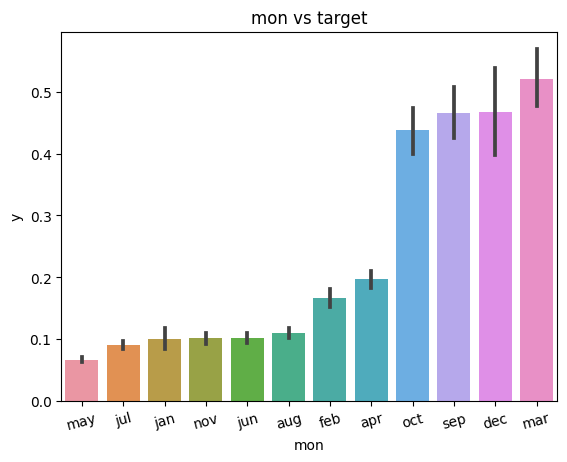

<Figure size 640x480 with 0 Axes>

In [45]:
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')
plt.show()
plt.tight_layout()

FROM MONTH VS TARGET , We got MAR month scored much amount to subscribe the insurance more than others. Because, the trend during the month of MARCH is high, as march being the end of financial year in INDIA and the month of DECEMBER is the second highest one as being the financial year in ABROADS.

# **PREV_OUTCOME**

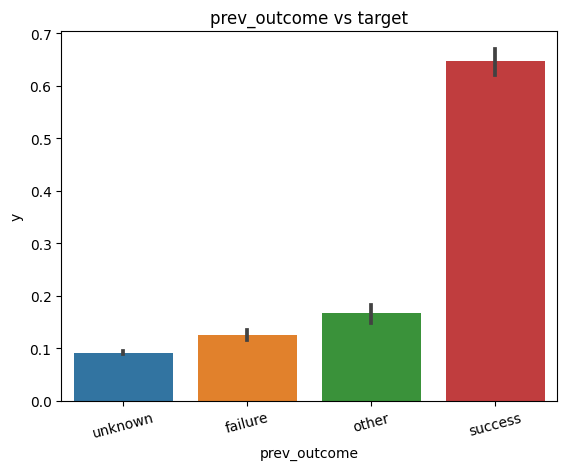

<Figure size 640x480 with 0 Axes>

In [46]:
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')
plt.show()
plt.tight_layout()

FROM PREVIOUS OUTCOME VS TARGET , We got SUCCESS people interested more to subscribe the insurance more than others.

There is no linear increase in Previous outcome column.SO, we will go with prev_outcome.

# **FEATURES VS TARGET PLOTS TOGETHER**

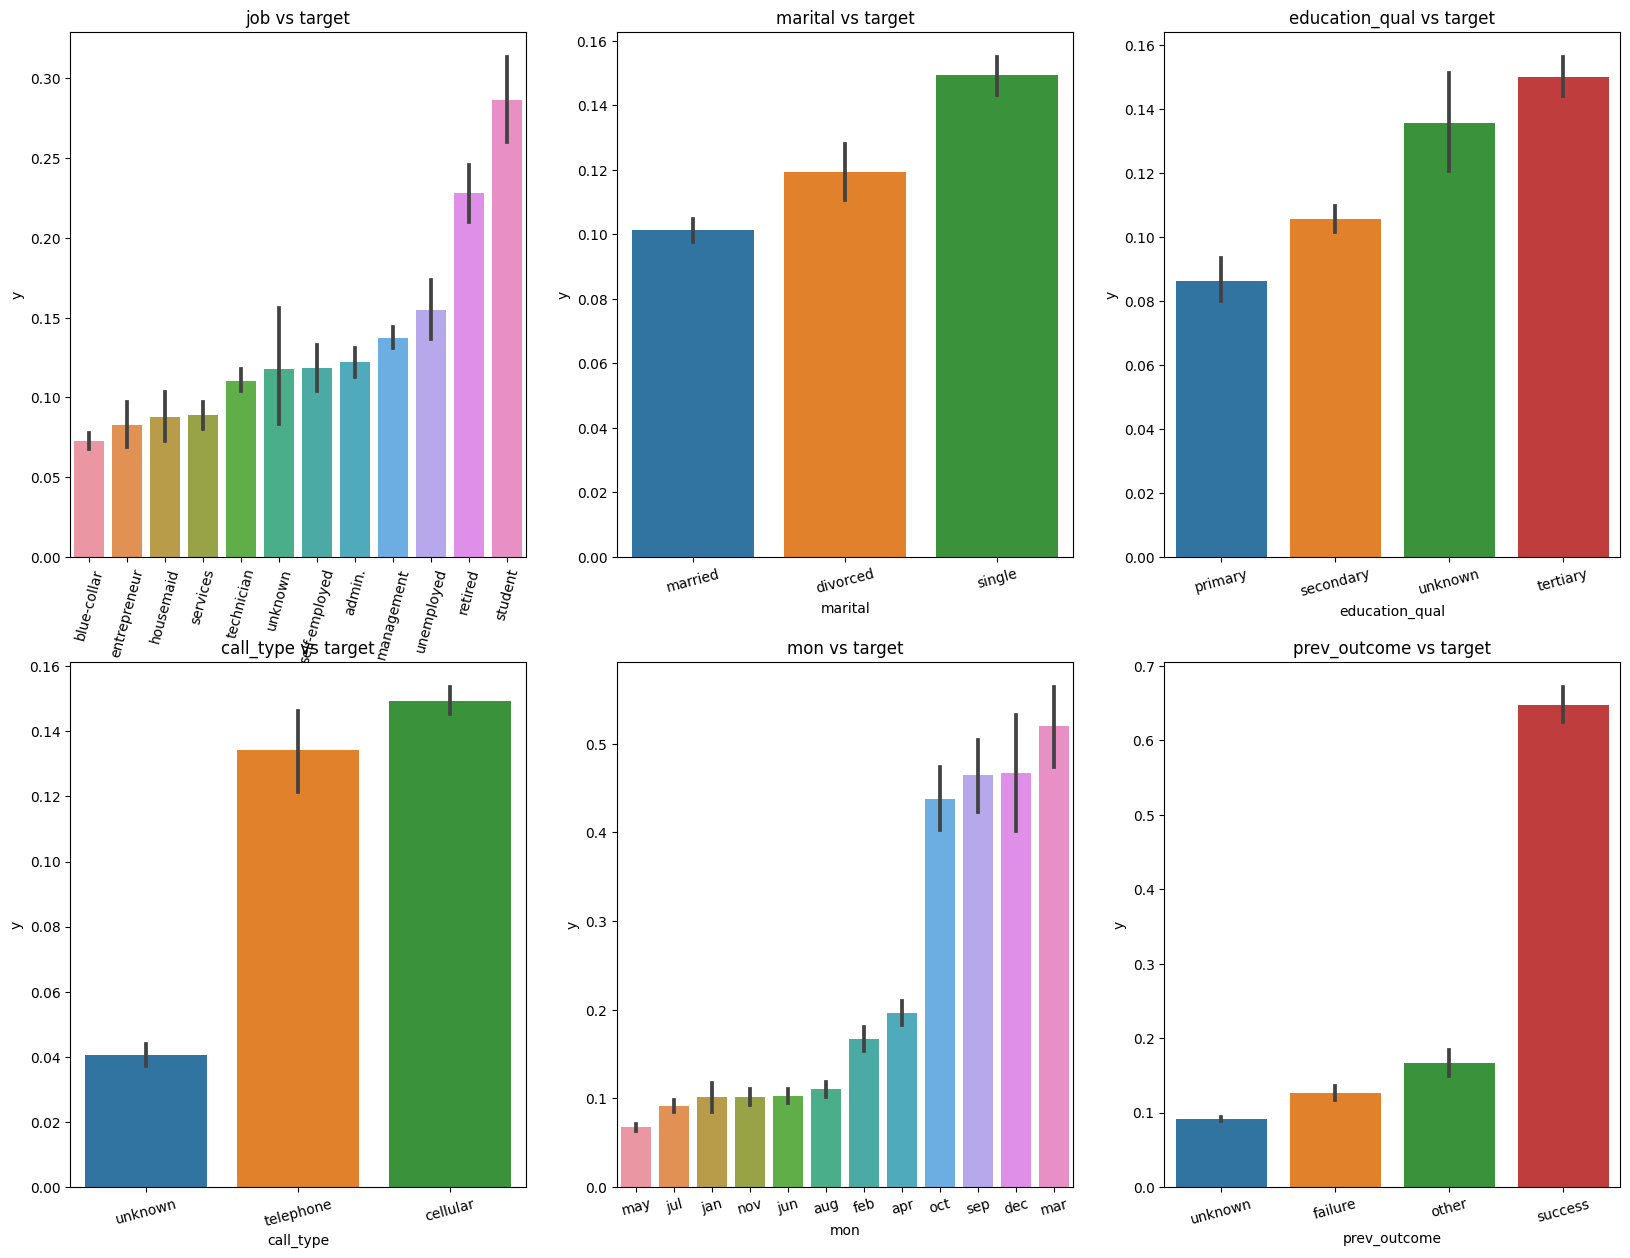

<Figure size 640x480 with 0 Axes>

In [47]:
plt.figure(figsize=(20,15))

plt.subplot(231)
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=75)
plt.title('job vs target')

plt.subplot(232)
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')

plt.subplot(233)
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')

plt.subplot(234)
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')

plt.subplot(235)
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')

plt.subplot(236)
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')

plt.show()
plt.tight_layout()

# ***CONTINUOUS FEATURES***

# **AGE**

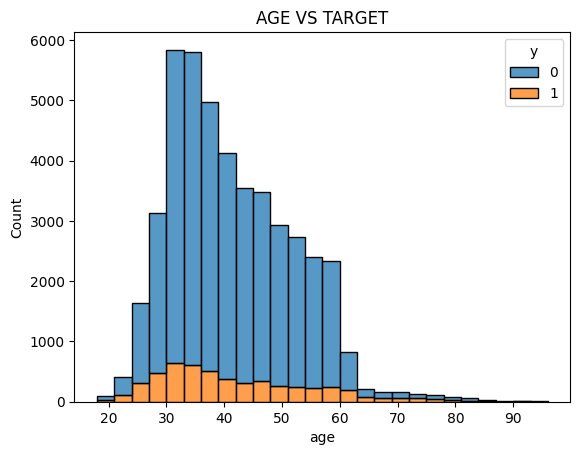

<Figure size 640x480 with 0 Axes>

In [48]:
sns.histplot(data=data, x="age", hue="y", multiple="stack",binwidth=3)
plt.title('AGE VS TARGET')

plt.show()
plt.tight_layout()

Middle Age peoples insured more than the young and aged ones.

# **DAY**

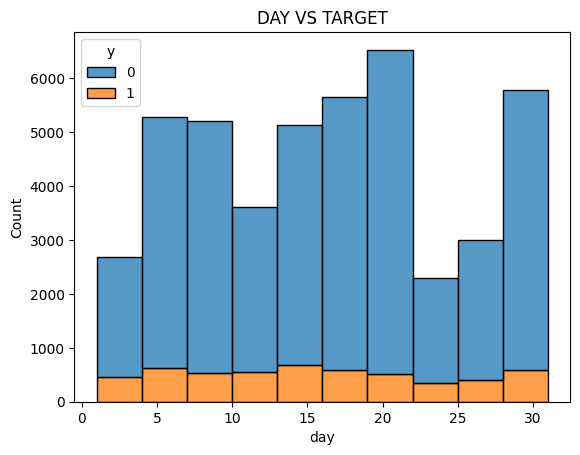

<Figure size 640x480 with 0 Axes>

In [49]:
sns.histplot(data=data, x="day", hue="y", multiple="stack",binwidth=3)
plt.title('DAY VS TARGET')

plt.show()
plt.tight_layout()

Day may not a reason for subscribtion. Etheir we can drop or not. It's upto we to decide

# **DUR**

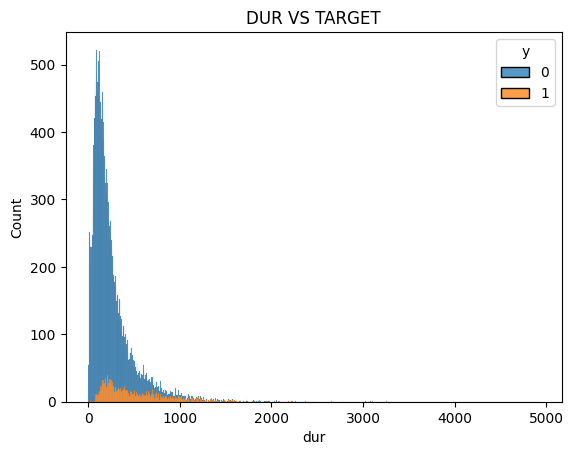

<Figure size 640x480 with 0 Axes>

In [50]:
sns.histplot(data=data, x="dur", hue="y", multiple="stack",binwidth=3)
plt.title('DUR VS TARGET')
plt.show()
plt.tight_layout()

Duration of the call plays a major role in subcribtion.

# **NUM_CALLS**

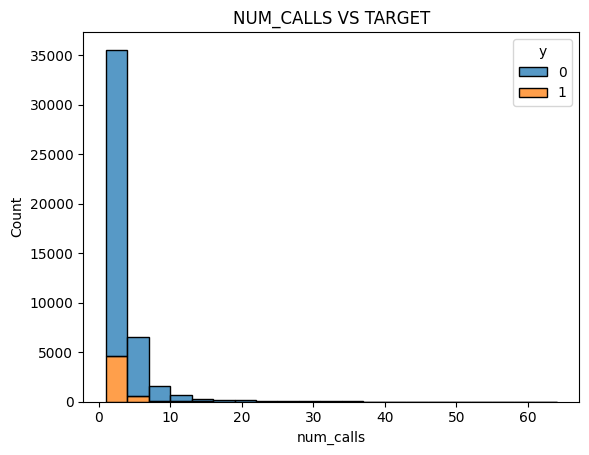

<Figure size 640x480 with 0 Axes>

In [51]:
sns.histplot(data=data, x="num_calls", hue="y", multiple="stack",binwidth=3)
plt.title('NUM_CALLS VS TARGET')

plt.show()
plt.tight_layout()

Number of calls may be one of the reason for the subscription.

# **CONTINUOUS FEATURES VS TARGET PLOTS TOGETHER**

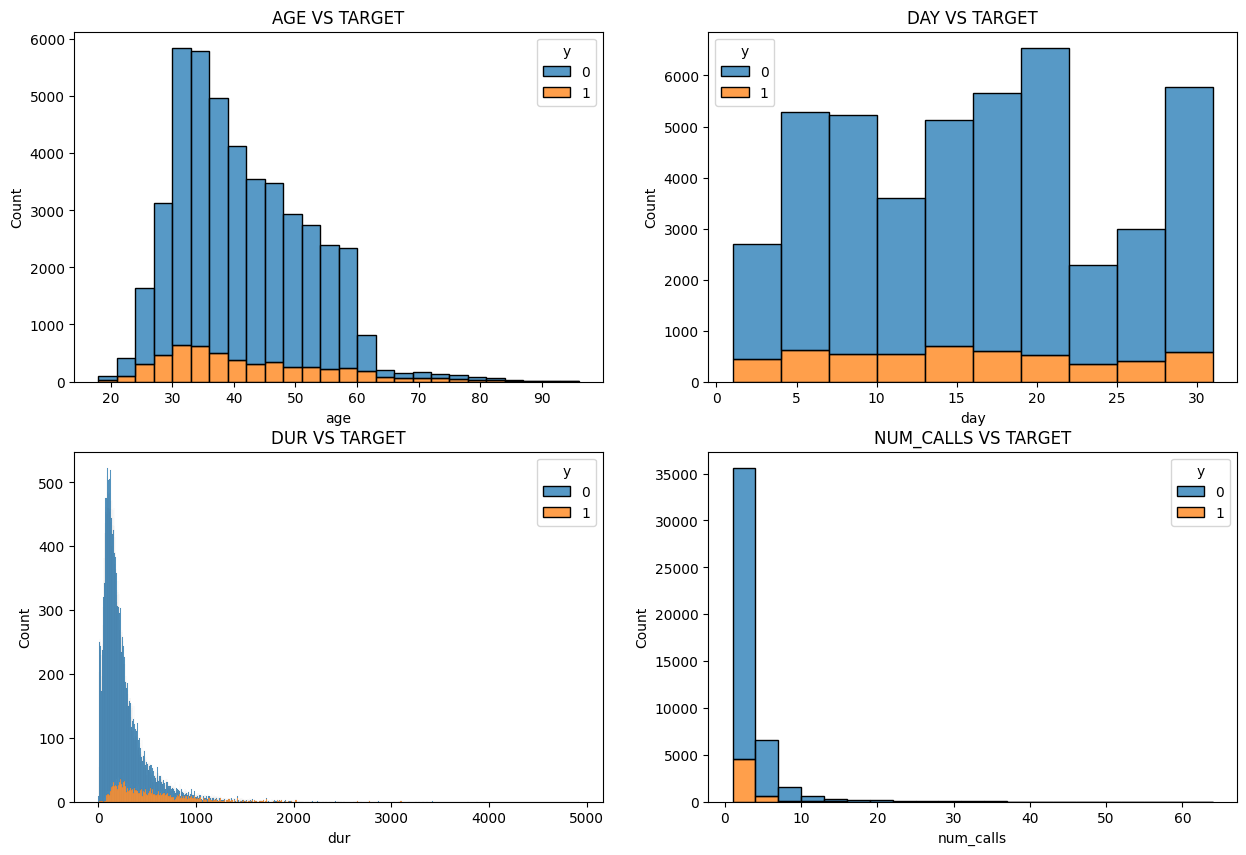

<Figure size 640x480 with 0 Axes>

In [52]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.histplot(data=data, x="age", hue="y", multiple="stack",binwidth=3)
plt.title('AGE VS TARGET')

plt.subplot(222)
sns.histplot(data=data, x="day", hue="y", multiple="stack",binwidth=3)
plt.title('DAY VS TARGET')

plt.subplot(223)
sns.histplot(data=data, x="dur", hue="y", multiple="stack",binwidth=3)
plt.title('DUR VS TARGET')

plt.subplot(224)
sns.histplot(data=data, x="num_calls", hue="y", multiple="stack",binwidth=3)
plt.title('NUM_CALLS VS TARGET')

plt.show()
plt.tight_layout()

# ***FEATURE ANALYSIS***

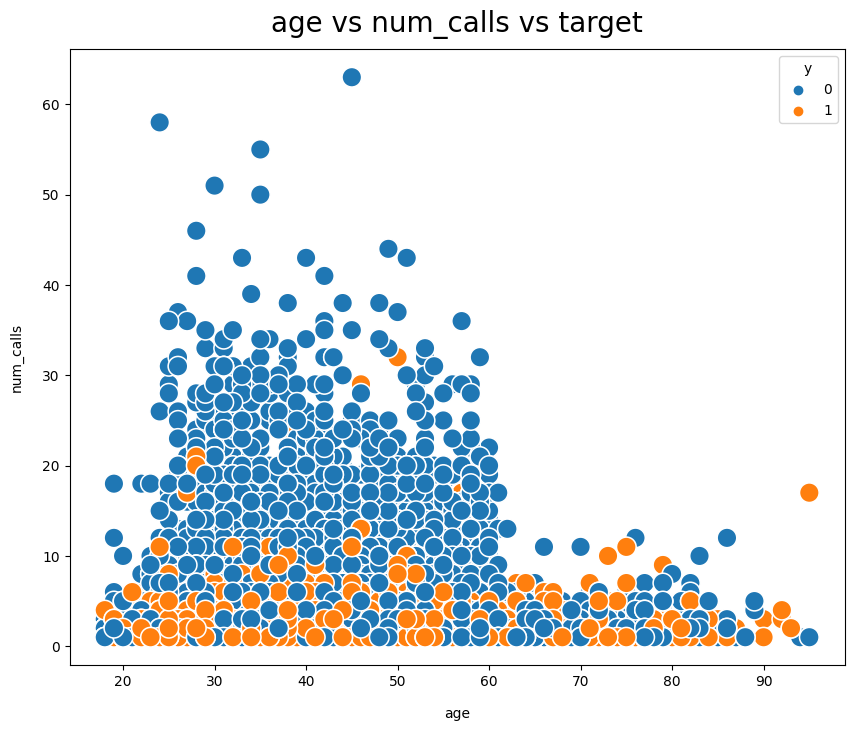

In [53]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='num_calls', hue='y', data=data, s=200)
plt.title("age vs num_calls vs target", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("num_calls", labelpad=13)
ax = plt.gca()

Age may be the reason for the bank people to increase the number of calls.

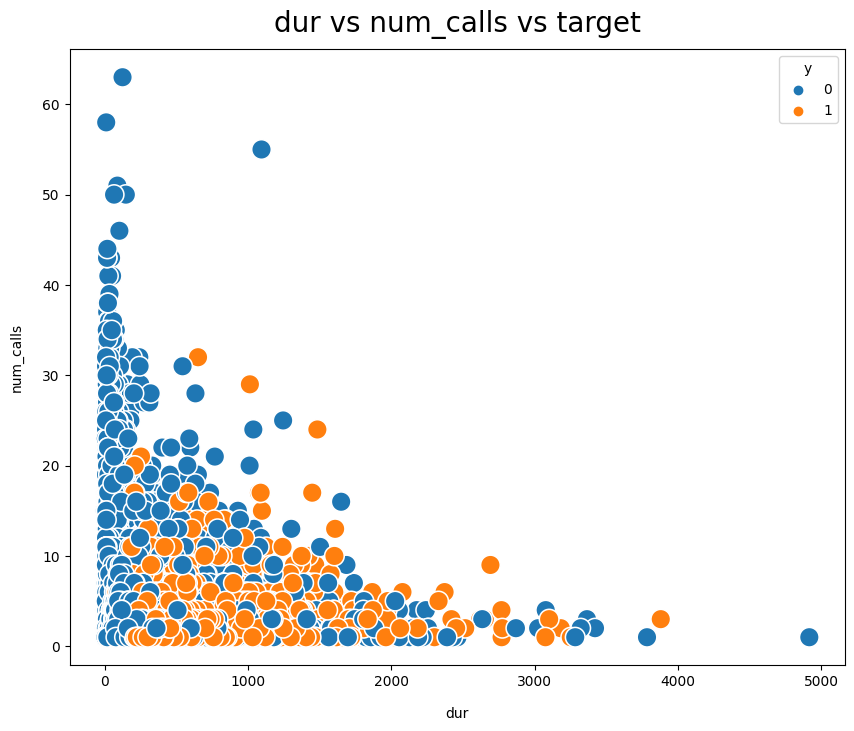

In [54]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='dur', y='num_calls', hue='y', data=data, s=200)
plt.title("dur vs num_calls vs target", y=1.015, fontsize=20)
plt.xlabel("dur", labelpad=13)
plt.ylabel("num_calls", labelpad=13)
ax = plt.gca()

From this plot we can observe that the people who doesn't pick and who doesn't subcribe the insurance may leads to call more number of times.

Another view of the plot is the insurance subscribed more when they spend more duration to discuss with the bank people to know about insurance policies.

FROM EDA PART,

The 3 feature importance in our point of view:

1. Number calls they made
2. Duration of the call they spend
3. Maritial status

# **ENCODE THE DATA**

In [55]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

In [56]:
data.to_csv("data_for_streamlit")

In [57]:
data['job']=data['job'].map({'management':8, 'technician':4, 'entrepreneur':1, 'blue-collar':0,
       'unknown':5, 'retired':10, 'admin.':7, 'services':3, 'self-employed':6,
       'unemployed':9, 'housemaid':2, 'student':11})
data['education_qual']=data['education_qual'].map({'tertiary':2, 'unknown':3, 'secondary':1, 'primary':0})
data['call_type']=data['call_type'].map({'unknown':1,'telephone':0,'cellular':2})
data['mon']=data['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,married,2,1,5,0,261,1,unknown,0
1,44,4,single,1,1,5,0,151,1,unknown,0
2,33,1,married,1,1,5,0,76,1,unknown,0
3,47,0,married,3,1,5,0,92,1,unknown,0
4,33,5,single,3,1,5,0,198,1,unknown,0


# **ONE-HOT ENCODING**

In [58]:
data= pd.get_dummies(data, columns=["marital",'prev_outcome'])
data.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,2,1,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,1,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,1,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,3,1,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,3,1,5,0,198,1,0,0,0,1,0,0,0,1


We done with the Encoding part.Now, move with the target and feature selection

# **TARGET AND FEATURE SELECTION**

In [59]:
X = data[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = data['y'].values

We have selected our features and the target variable

# **SPLITTING**

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

We have split the data

In [61]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import imblearn

# **Random Undersampling:**

In [63]:
from imblearn.under_sampling import RandomUnderSampler #  import 
rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X_train, y_train) #resampling the data

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr1 = LogisticRegression()
lr1.fit(X_rus,y_rus)
lr1.score(X_rus,y_rus)

0.807546274323683

# **Random Oversampling:**

In [65]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X_train, y_train) #Fit the model

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr2 = LogisticRegression()
lr2.fit(X_ros,y_ros)
lr2.score(X_ros,y_ros)

0.8016431924882629

# **SMOTE:**

In [67]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr3 = LogisticRegression()
lr3.fit(X_sm,y_sm)
lr3.score(X_sm,y_sm)

0.8603912363067293

In [69]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import imblearn

In [71]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_smt, y_smt = smt.fit_resample(X_train, y_train) 

In [72]:
X_smt

array([[54,  0,  1, ...,  0,  0,  1],
       [53,  2,  1, ...,  0,  0,  1],
       [28,  7,  1, ...,  0,  0,  0],
       ...,
       [34,  2,  0, ...,  0,  0,  1],
       [52,  1,  1, ...,  0,  0,  1],
       [33,  3,  1, ...,  0,  0,  1]])

In [73]:
import collections, numpy
counter = collections.Counter(y_smt)
counter

Counter({0: 23549, 1: 30308})

# **1. Logistic Regression**

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X_smt,y_smt)

0.9126947286332324

In [75]:
lr.predict_proba(X_test)

array([[0.54878287, 0.45121713],
       [0.92701722, 0.07298278],
       [0.60813126, 0.39186874],
       ...,
       [0.9088202 , 0.0911798 ],
       [0.97599928, 0.02400072],
       [0.90251608, 0.09748392]])

In [95]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **2. DECISION TREE:**

In [85]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score

In [86]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.7911738259696734


In [108]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier(max_depth=4) 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

0.9068459067530683
AUROC on the sampled dataset :  0.8671732187377751


# **3. K-NEAREST NEIGHBOUR:**

In [109]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test, y_test, cv=10)))

K value : 1 Cross Value Accuracy : 0.85388867158852
K value : 2 Cross Value Accuracy : 0.8793278492152741
K value : 3 Cross Value Accuracy : 0.8791079548232533
K value : 4 Cross Value Accuracy : 0.8847484476604899
K value : 5 Cross Value Accuracy : 0.8847488143548624
K value : 6 Cross Value Accuracy : 0.8857437784188139
K value : 7 Cross Value Accuracy : 0.8846379504229208
K value : 8 Cross Value Accuracy : 0.8851905588422235
K value : 9 Cross Value Accuracy : 0.8853015450056226
K value : 10 Cross Value Accuracy : 0.8853011783112501
K value : 20 Cross Value Accuracy : 0.884858944898059
K value : 30 Cross Value Accuracy : 0.8847480809661175
K value : 40 Cross Value Accuracy : 0.8843054808585536
K value : 50 Cross Value Accuracy : 0.8833100278687723


In [110]:
knn= KNeighborsClassifier(6)
knn.fit(X_smt, y_smt)
print(knn.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(X_test)[:, 1]))

0.9924615184655662
AUROC on the sampled dataset :  0.7980050096631615


# **4. XG_BOOST:**

In [111]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.8997913509020681
Learning rate :  0.02  Cross-Val score :  0.9000124676086637
Learning rate :  0.03  Cross-Val score :  0.8997915953649832
Learning rate :  0.04  Cross-Val score :  0.8997913509020682
Learning rate :  0.05  Cross-Val score :  0.899349361951792
Learning rate :  0.1  Cross-Val score :  0.8984641617366644
Learning rate :  0.11  Cross-Val score :  0.8987955312179141
Learning rate :  0.12  Cross-Val score :  0.8969154891702928
Learning rate :  0.13  Cross-Val score :  0.899791839827898
Learning rate :  0.14  Cross-Val score :  0.8991282452451962
Learning rate :  0.15  Cross-Val score :  0.8976897032220211
Learning rate :  0.2  Cross-Val score :  0.8978009338483351
Learning rate :  0.5  Cross-Val score :  0.8928230577421405
Learning rate :  0.7  Cross-Val score :  0.8912749963330562
Learning rate :  1  Cross-Val score :  0.8899471960103652


# **5. Random Forest**

In [113]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [117]:
data.columns

Index(['age', 'job', 'education_qual', 'call_type', 'day', 'mon', 'dur',
       'num_calls', 'y', 'marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown'],
      dtype='object')